# HOMEWORK 1 
## AUTHOR: 
Giulio Martini
## PROFESSOR:
Dr. Ryan T. White
## DATE:
09 / 27 / 2022
## COURSE:
MTH 4320 - Neural Networks


## QUESTION I 

    Question I is provided in a different image file than this jupyter notebook. The computational graph and the backpropagation (partial derivatives included) are written in a physical notebook.

    Thee code snippet below helps the user find the mathematical interpretation of the backpropagation; in other words, the extended formula. 


In [1]:
# Various libraties used for mathematical purposes. 
import numpy as np
import math
from sympy import symbols, diff
import math
# Paramaters are defined as symbols to be used for partial differentiazation. 
w0, w1, x1, w2, x2 = symbols('w0 w1 x1 w2 x2 ', real=True)
# Definition of the function. 
f = w0 + w1*x1 + w2*x2
# Definition of term.
firstTerm  = math.e ** f
secondTerm = math.e ** (-f)
# Identity creation. 
firstSubtraction = firstTerm - secondTerm
firstAddition = firstTerm + secondTerm
finalFunction = firstSubtraction / firstAddition
# The partial differentialazation begins. 
w0Diff = diff(finalFunction, w0)
w0DiffString = str(w0Diff)
# To avoid a massive output message, Neper's mathematical number is replaced by its alphabetical notion. 
w0DiffString = w0DiffString.replace('2.71828182845905', 'e')
w0DiffString = w0DiffString.replace('**', '^')

#df/dW0 outputted.
print(w0DiffString)
print('PARTIAL DERIVATIVE FOR W0')

print('---------------------')

w1Diff = diff(finalFunction, w1)
w1DiffString = str(w1Diff)
w1DiffString = w1DiffString.replace('2.71828182845905', 'e')
w1DiffString = w1DiffString.replace('**', '^')

#df/dW1 outputted.
print(w1DiffString)
print('PARTIAL DERIVATIVE FOR W1')

print('---------------------')

#df/dX1 outputted.
x1Diff = diff(finalFunction, x1)
x1DiffString = str(x1Diff)
x1DiffString = x1DiffString.replace('2.71828182845905', 'e')
x1DiffString = x1DiffString.replace('**', '^')

print(x1DiffString)
print('PARTIAL DERIVATIVE FOR X1')

print('---------------------')

#df/dW2 outputted.
w2Diff = diff(finalFunction, w2)
w2DiffString = str(w2Diff)
w2DiffString = w2DiffString.replace('2.71828182845905', 'e')
w2DiffString = w2DiffString.replace('**', '^')

print(w2DiffString)
print('PARTIAL DERIVATIVE FOR W2')

print('---------------------')

#df/dX2 outputted.
x2Diff = diff(finalFunction, x2)
x2DiffString = str(x2Diff)
x2DiffString = x2DiffString.replace('2.71828182845905', 'e')
x2DiffString = x2DiffString.replace('**', '^')

print(x2DiffString)
print('PARTIAL DERIVATIVE FOR X2')

print('---------------------')







(-e^(-w0 - w1*x1 - w2*x2) + e^(w0 + w1*x1 + w2*x2))*(1.0*e^(-w0 - w1*x1 - w2*x2) - 1.0*e^(w0 + w1*x1 + w2*x2))/(e^(-w0 - w1*x1 - w2*x2) + e^(w0 + w1*x1 + w2*x2))^2 + (1.0*e^(-w0 - w1*x1 - w2*x2) + 1.0*e^(w0 + w1*x1 + w2*x2))/(e^(-w0 - w1*x1 - w2*x2) + e^(w0 + w1*x1 + w2*x2))
PARTIAL DERIVATIVE FOR W0
---------------------
(-e^(-w0 - w1*x1 - w2*x2) + e^(w0 + w1*x1 + w2*x2))*(1.0*e^(-w0 - w1*x1 - w2*x2)*x1 - 1.0*e^(w0 + w1*x1 + w2*x2)*x1)/(e^(-w0 - w1*x1 - w2*x2) + e^(w0 + w1*x1 + w2*x2))^2 + (1.0*e^(-w0 - w1*x1 - w2*x2)*x1 + 1.0*e^(w0 + w1*x1 + w2*x2)*x1)/(e^(-w0 - w1*x1 - w2*x2) + e^(w0 + w1*x1 + w2*x2))
PARTIAL DERIVATIVE FOR W1
---------------------
(-e^(-w0 - w1*x1 - w2*x2) + e^(w0 + w1*x1 + w2*x2))*(1.0*e^(-w0 - w1*x1 - w2*x2)*w1 - 1.0*e^(w0 + w1*x1 + w2*x2)*w1)/(e^(-w0 - w1*x1 - w2*x2) + e^(w0 + w1*x1 + w2*x2))^2 + (1.0*e^(-w0 - w1*x1 - w2*x2)*w1 + 1.0*e^(w0 + w1*x1 + w2*x2)*w1)/(e^(-w0 - w1*x1 - w2*x2) + e^(w0 + w1*x1 + w2*x2))
PARTIAL DERIVATIVE FOR X1
---------------------
(-e^

## QUESTION 2 
    Question II requires the student to place all three activation functions inside a Feed Forward Neural Network, which will be now called FFNN. All activations and their derivatives are defined as methods inside the data structure, and the parameter 'choice' is used to decide which activation function to use. 

    Each activation is then tested below, using the XOR example presented by Dr. White; the different epochs will show whether the losses decrease. 

In [2]:

#Basic version of a Feed Forward Neural Network provided by my professor Dr. Ryan T. White. 
#It is renamed 'FeedforwardNeuralNetworkTwo' in order to differentiate it from the next one (SDG)
class FeedforwardNeuralNetworkTwo:
    
    # The constructor takes the number of nodes at each layer ('layers', a vector of integers), the choice of activation function (0 for 'sigmoid'
    # 1 for 'hyperbolic tangent' and 2 for 'ReLU'); the default value is the sigmoid activation. 'alpha' is the learning rate; the default value is 0.1
    def __init__(self, layers, choice = 0, alpha = 0.1):
        
        # list of weight matrices between layers
        self.W = []
        
        # network architecture will be a vector of numbers of nodes for each layer
        self.layers = layers
        
        # learning rate
        self.alpha = alpha
        
        self.choice = choice
        # initialize the weights (randomly) -- this is our initial guess for gradient descent
        
        # initialize the weights between layers (up to the next-to-last one) as normal random variables
        for i in np.arange(0, len(layers) - 2):
            self.W.append(np.random.randn(layers[i] + 1, layers[i + 1] + 1))
            
        # initialize weights between the last two layers (we don't want bias for the last one)
        self.W.append(np.random.randn(layers[-2] + 1, layers[-1]))
        
    # define the sigmoid activation
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    # define the sigmoid derivative (where z is the output of a sigmoid)
    def sigmoidDerivative(self, z):
        return z * (1 - z)
    
    def ReLU(self, x):
        return np.maximum(0.0, x)
    
    #define the ReLU derivative (where z is the output of a ReLU):
    def ReLUDerivative(self, z):
        z[z<=0] = 0
        z[z > 0] = 1
        return z
    
    #define the hyperbolic tangent activation:
    def tanh(self, x):
        temp = x
        x  = np.e**(temp)
        y = np.e**(-1*temp)
        term1 = x-y
        term2 = x+y
        return term1/term2

    
    #define the hyperbolic tangent derivative (where z is the output of a hyperbolic tangent)
    def tanhDerivative(self, z):
        return 1 / (np.cosh(z) ** 2)
    
    # fit the model
    def fit(self, X, y, epochs = 10000, update = 1000):
        
        if (self.choice == 0):
                # add a column of ones to the end of X
                X = np.hstack((X, np.ones([X.shape[0],1])))

                for epoch in np.arange(0,epochs):

                    # feed forward, backprop, and weight update
                    for (x, target) in zip(X, y):
                        
                        # make a list of output activations from the first layer
                        # (just the original x values)
                        A = [np.atleast_2d(x)]
                        
                        # feed forward
                        for layer in np.arange(0, len(self.W)):
                            
                            # feed through one layer and apply sigmoid activation
                            net = A[layer].dot(self.W[layer])
                            out = self.sigmoid(net)
                            
                            # add our network output to the list of activations
                            A.append(out)
                            
                        # backpropagation
                        error = A[-1] - target
                        
                        # term proportional to the gradient
                        D = [error * self.sigmoidDerivative(A[-1])]
                        
                        # loop backwards over the layers to build up deltas
                        for layer in np.arange(len(A) - 2, 0, -1):
                            delta = D[-1].dot(self.W[layer].T)
                            delta = delta * self.sigmoidDerivative(A[layer])
                            D.append(delta)
                            
                        # reverse the deltas since we looped in reverse
                        D = D[::-1]
                        
                        # weight update
                        for layer in np.arange(0, len(self.W)):
                            self.W[layer] -= self.alpha * A[layer].T.dot(D[layer])
                            
                    # print a status update
                    if (epoch + 1) % update == 0:
                        loss = self.computeLoss(X,y)
                        print('Epoch =', epoch + 1, 'loss = ', loss)
        elif (self.choice == 1):
               # add a column of ones to the end of X
                X = np.hstack((X, np.ones([X.shape[0],1])))

                for epoch in np.arange(0,epochs):

                    # feed forward, backprop, and weight update
                    for (x, target) in zip(X, y):
                        
                        # make a list of output activations from the first layer
                        # (just the original x values)
                        A = [np.atleast_2d(x)]
                        
                        # feed forward
                        for layer in np.arange(0, len(self.W)):
                            
                            # feed through one layer and apply sigmoid activation
                            net = A[layer].dot(self.W[layer])
                            out = self.tanh(net)
                            
                            # add our network output to the list of activations
                            A.append(out)
                            
                        # backpropagation
                        error = A[-1] - target
                        
                        # term proportional to the gradient
                        D = [error * self.tanhDerivative(A[-1])]
                        
                        # loop backwards over the layers to build up deltas
                        for layer in np.arange(len(A) - 2, 0, -1):
                            delta = D[-1].dot(self.W[layer].T)
                            delta = delta * self.tanhDerivative(A[layer])
                            D.append(delta)
                            
                        # reverse the deltas since we looped in reverse
                        D = D[::-1]
                        
                        # weight update
                        for layer in np.arange(0, len(self.W)):
                            self.W[layer] -= self.alpha * A[layer].T.dot(D[layer])
                            
                    # print a status update
                    if (epoch + 1) % update == 0:
                        loss = self.computeLoss(X,y)
                        print('Epoch =', epoch + 1, 'loss = ', loss)

        elif (self.choice == 2):
               # add a column of ones to the end of X
                X = np.hstack((X, np.ones([X.shape[0],1])))

                for epoch in np.arange(0,epochs):

                    # feed forward, backprop, and weight update
                    for (x, target) in zip(X, y):
                        
                        # make a list of output activations from the first layer
                        # (just the original x values)
                        A = [np.atleast_2d(x)]
                        
                        # feed forward
                        for layer in np.arange(0, len(self.W)):
                            
                            # feed through one layer and apply sigmoid activation
                            net = A[layer].dot(self.W[layer])
                            out = self.ReLU(net)
                            
                            # add our network output to the list of activations
                            A.append(out)
                            
                        # backpropagation
                        error = A[-1] - target
                        
                        # term proportional to the gradient
                        D = [error * self.ReLUDerivative(A[-1])]
                        
                        # loop backwards over the layers to build up deltas
                        for layer in np.arange(len(A) - 2, 0, -1):
                            delta = D[-1].dot(self.W[layer].T)
                            delta = delta * self.ReLUDerivative(A[layer])
                            D.append(delta)
                            
                        # reverse the deltas since we looped in reverse
                        D = D[::-1]
                        
                        # weight update
                        for layer in np.arange(0, len(self.W)):
                            self.W[layer] -= self.alpha * A[layer].T.dot(D[layer])
                            
                    # print a status update
                    if (epoch + 1) % update == 0:
                        loss = self.computeLoss(X,y)
                        print('Epoch =', epoch + 1, 'loss = ', loss)  
                print(epoch)
                
    def predict(self, X, addOnes = True):
        if (self.choice == 0):
                # initialize data, be sure it's the right dimension
                p = np.atleast_2d(X)
                
                # add a column of 1s for bias
                if addOnes:
                    p = np.hstack((p, np.ones([X.shape[0],1])))
                
                # feed forward!
                for layer in np.arange(0, len(self.W)):
                    p = self.sigmoid(np.dot(p, self.W[layer]))
                
                # return the predictions
                return p
        
        elif (self.choice == 1):
                # initialize data, be sure it's the right dimension
                p = np.atleast_2d(X)
                
                # add a column of 1s for bias
                if addOnes:
                    p = np.hstack((p, np.ones([X.shape[0],1])))
                
                # feed forward!
                for layer in np.arange(0, len(self.W)):
                    p = self.tanh(np.dot(p, self.W[layer]))
                
                # return the predictions
                return p     

        elif (self.choice == 2):     
                # initialize data, be sure it's the right dimension
                p = np.atleast_2d(X)
                
                # add a column of 1s for bias
                if addOnes:
                    p = np.hstack((p, np.ones([X.shape[0],1])))
                
                # feed forward!
                for layer in np.arange(0, len(self.W)):
                    p = self.ReLU(np.dot(p, self.W[layer]))
                
                # return the predictions
                return p     
    
    def computeLoss(self, X, y):
        # initialize data, be sure it's the right dimension
        y = np.atleast_2d(y)
        
        # feed the datapoints through the network to get predicted outputs
        predictions = self.predict(X, addOnes = False)
        
        # compute the sum of squared errors loss function
        loss = np.sum((predictions - y)**2) / 2.0
        
        return loss

In [12]:
# A sigmoid Neural Network is initialized, with its 
model = FeedforwardNeuralNetworkTwo([2, 2, 1])
vars(model)

{'W': [array([[-0.69011768, -1.75850931,  1.72411316],
         [-0.14269156,  0.08601921,  1.51434952],
         [ 0.33512492,  0.14607799,  0.47208611]]),
  array([[ 0.47913578],
         [ 0.30731432],
         [-0.02529486]])],
 'layers': [2, 2, 1],
 'alpha': 0.1,
 'choice': 0}

### The sigmoid function is tested first, and based on the epochs' loss and final prediction, it is a success.

In [13]:
import random

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X,y,50000,1000)

Epoch = 1000 loss =  0.4909392630443806
Epoch = 2000 loss =  0.4495157446421928
Epoch = 3000 loss =  0.3498034622221903
Epoch = 4000 loss =  0.21505712853457973
Epoch = 5000 loss =  0.05834955924528011
Epoch = 6000 loss =  0.022265612557350982
Epoch = 7000 loss =  0.012504550333282148
Epoch = 8000 loss =  0.008426167844129164
Epoch = 9000 loss =  0.006268375522220831
Epoch = 10000 loss =  0.004955748088491236
Epoch = 11000 loss =  0.004081262035044702
Epoch = 12000 loss =  0.003460448338672653
Epoch = 13000 loss =  0.002998618744920126
Epoch = 14000 loss =  0.002642539992460004
Epoch = 15000 loss =  0.0023601355702511876
Epoch = 16000 loss =  0.0021309929366460636
Epoch = 17000 loss =  0.0019415368918424146
Epoch = 18000 loss =  0.0017824054568131155
Epoch = 19000 loss =  0.0016469427073372022
Epoch = 20000 loss =  0.0015302925527617833
Epoch = 21000 loss =  0.0014288322767260948
Epoch = 22000 loss =  0.0013398064563009573
Epoch = 23000 loss =  0.0012610834353113634
Epoch = 24000 loss 

In [14]:
model.predict(X)

array([[0.00799644],
       [0.98340303],
       [0.98551388],
       [0.02049117]])

### Hyperbolic tangent is then tested; once again, based on the epochs loss and final predictions, it is deemed a success.

In [20]:
model = FeedforwardNeuralNetworkTwo([2, 2, 1],1)
vars(model)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X,y,50000,1000)

Epoch = 1000 loss =  0.00044094496573015944
Epoch = 2000 loss =  6.469546718927678e-05
Epoch = 3000 loss =  2.3814909434269227e-05
Epoch = 4000 loss =  1.2091980382025013e-05
Epoch = 5000 loss =  7.241432914259515e-06
Epoch = 6000 loss =  4.795289579132099e-06
Epoch = 7000 loss =  3.3977793515440684e-06
Epoch = 8000 loss =  2.5275816097564684e-06
Epoch = 9000 loss =  1.949319483010543e-06
Epoch = 10000 loss =  0.005375728489773207
Epoch = 11000 loss =  0.0012782266975600288
Epoch = 12000 loss =  0.0010935983673462683
Epoch = 13000 loss =  0.0009721904144786541
Epoch = 14000 loss =  0.0008768098526030045
Epoch = 15000 loss =  0.0007980369852058424
Epoch = 16000 loss =  0.0007311984285351363
Epoch = 17000 loss =  0.0006734948043319209
Epoch = 18000 loss =  0.0006230491527796204
Epoch = 19000 loss =  0.0005785128141402994
Epoch = 20000 loss =  0.0005388724409627758
Epoch = 21000 loss =  0.0005033429099106831
Epoch = 22000 loss =  0.00047130212517305497
Epoch = 23000 loss =  0.000442248520

In [21]:
model.predict(X)

array([[-3.74474801e-03],
       [ 9.99789894e-01],
       [ 9.99736303e-01],
       [ 6.36575182e-04]])

### ReLU is tested for last; differently from the last two activations, the learning rate must be decreaed in order to not encounter the 'dying ReLU' issue; the loss must not stop at 0.5 or 1, it must keep going down. 
### Nevertheless, once more, based on the epochs' losses and predicted output, it is successful. 

In [23]:
model = FeedforwardNeuralNetworkTwo([2, 2, 1],2,0.005)
vars(model)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X,y,50000,1000)

Epoch = 1000 loss =  0.256995543038423
Epoch = 2000 loss =  0.03557224925512826
Epoch = 3000 loss =  0.002384713478813862
Epoch = 4000 loss =  0.0001291874270514368
Epoch = 5000 loss =  6.629795693413665e-06
Epoch = 6000 loss =  3.3652214464568225e-07
Epoch = 7000 loss =  1.6933448724453804e-08
Epoch = 8000 loss =  8.568585560447934e-10
Epoch = 9000 loss =  4.308830384579313e-11
Epoch = 10000 loss =  2.180090419043679e-12
Epoch = 11000 loss =  1.1029898941845434e-13
Epoch = 12000 loss =  5.546216074226586e-15
Epoch = 13000 loss =  2.8062754587392154e-16
Epoch = 14000 loss =  1.4110501033443062e-17
Epoch = 15000 loss =  7.139006717959188e-19
Epoch = 16000 loss =  3.589791674094188e-20
Epoch = 17000 loss =  1.8163372424023526e-21
Epoch = 18000 loss =  9.188687300732562e-23
Epoch = 19000 loss =  4.624207938557772e-24
Epoch = 20000 loss =  2.3574467358199727e-25
Epoch = 21000 loss =  1.3217633547433958e-26
Epoch = 22000 loss =  5.971597776784606e-27
Epoch = 23000 loss =  5.971597776784606e

In [24]:
model.predict(X)

array([[1.50413180e-14],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.47403086e-14]])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import warnings

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


## QUESTION III
    Question III requires the student to train the MNist set for a ful SDG (Stochastic Gradient Descent) FFNN. The code below is an updated version of the previous FFNN, which uses SDG. Placed inside are also the other two activation functions. Two different graphs will be outputted for each activation function, along with a classification report to determine the percentage accuracy. 

## QUESTION IV
    Question IV asks the student to test each activation function and observe differences in accuracy and computational time performances. 

In [ ]:
    
    
    
# This class is for a fully-connected feedforward neural network using stochastic gradient descent
#
# Inputs:
#
#   layers - a list of numbers of neurons in each layer
#
#   alpha - learning rate
#
#   lambda1 - L1 penalty coefficient
#
#   lambda2 - L2 penalty coefficient
#
#   batchSize - size of mini-batches for SGD
#
#   loss - string to choose which loss function to use:
#     'sum-of-squares'
#     'cross-entropy'

class FeedforwardNeuralNetwork:
    
    def __init__(self, layers, alpha = 0.1, lambda1 = 0, lambda2 = 0, batchSize = 32, loss = 'sum-of-squares', choice = 0):
        # list of weight matrices between layers
        self.W = []
        
        # network architecture will be a vector of numbers of nodes for each layer
        self.layers = layers
        
        # learning rate
        self.alpha = alpha
        
        # L1 penalty coefficient
        self.lambda1 = lambda1
        
        # L2 penalty coefficient
        self.lambda2 = lambda2
        
        # batch size
        self.batchSize = batchSize
        
        # loss function
        self.loss = loss

        self.choice = choice 
        
        # initialize the weights (randomly) -- this is our initial guess for gradient descent
        
        # initialize the weights between layers (up to the next-to-last one) as normal random variables
        for i in np.arange(0, len(layers) - 2):
            self.W.append(np.random.randn(layers[i] + 1, layers[i + 1] + 1)/100.0)
            
        # initialize weights between the last two layers (we don't want bias for the last one)
        self.W.append(np.random.randn(layers[-2] + 1, layers[-1])/100.0)
  
    # define the activation function
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    # define the activation derivative (where x is the INPUT to activation function)
    def sigmoidDerivative(self, z):
        return z * (1 - z)

    def ReLU(self, x):
        return np.maximum(0.0, x)
    
    #define the ReLU derivative (where z is the output of a ReLU):
    def ReLUDerivative(self, z):
        z[z<=0] = 0
        z[z > 0] = 1
        return z
    
    #define the hyperbolic tangent activation:
    def tanh(self, x):
        temp = x
        x  = np.e**(temp)
        y = np.e**(-1*temp)
        term1 = x-y
        term2 = x+y
        return term1/term2
    
    #define the hyperbolic tangent derivative (where z is the output of a hyperbolic tangent)
    def tanhDerivative(self, z):
        x = np.e**(z)
        y = np.e**(-1*z)
        term1 = x + y
        term2 = (2 / term1)**2
        return term2
    
    def getNextBatch(self, X, y, batchSize):
        for i in np.arange(0, X.shape[0], batchSize):
            yield (X[i:i + batchSize], y[i:i + batchSize])
    
    # fit the model
    def fit(self, X, y, testX, testY, epochs = 10000, update = 1000, printPerformance = True):

        if (self.choice == 0):
                            # add a column of ones to the end of X
                            X = np.hstack((X, np.ones([X.shape[0],1])))
                            losses = []
                            trainAccuracies = []
                            testAccuracies = []
                            trainY = y
                            
                            numberOfExamples = X.shape[0]
                            
                            # use one-hot encoding for the training labels
                            y = to_categorical(y)

                            for epoch in np.arange(0,epochs):
                                
                                # randomize the examples
                                p = np.arange(0,X.shape[0])
                                np.random.shuffle(p)
                                X = X[p]
                                y = y[p]

                                # feed forward, backprop, and weight update
                                for (x, target) in self.getNextBatch(X, y, self.batchSize):
                                    # make a list of output activations from the first layer
                                    # (just the original x values)
                                    A = [np.atleast_2d(x)]
                                    
                                    # feed forward
                                    for layer in np.arange(0, len(self.W)):
                                        
                                        # feed through one layer and apply sigmoid activation
                                        net = A[layer].dot(self.W[layer])
                                        out = self.sigmoid(net)
                                        
                                        # add our network output to the list of activations
                                        A.append(out)
                                        
                                    # backpropagation (coming soon!)
                                    error = A[-1] - target
                                    
                                    if self.loss == 'sum-of-squares':
                                        D = [error * self.sigmoidDerivative(A[-1])]
                                        
                                    if self.loss == 'cross-entropy':
                                        D = [error]
                                    
                                    # loop backwards over the layers to build up deltas
                                    for layer in np.arange(len(A) - 2, 0, -1):
                                        delta = D[-1].dot(self.W[layer].T)
                                        delta = delta * self.sigmoidDerivative(A[layer])
                                        D.append(delta)
                                        
                                    # reverse the deltas since we looped in reverse
                                    D = D[::-1]
                                    
                                    # weight update
                                    for layer in np.arange(0, len(self.W)):
                                        self.W[layer] -= self.alpha * (A[layer].T.dot(D[layer])
                                                                    + 2 * (self.lambda2 / numberOfExamples) * self.W[layer]
                                                                    + (self.lambda1 / numberOfExamples) * np.sign(self.W[layer]) * self.W[layer])

                                # print the loss (or maybe more) each 'update' number of epochs
                                if (epoch + 1) % update == 0:
                                    
                                    # compute the loss
                                    loss = self.computeLoss(X,y)

                                    # if we choose, compute the accuracy (this makes it run slower)
                                    if printPerformance:
                                        predictedY = self.predict(testX)
                                        predictedY = predictedY.argmax(axis=1)
                                        testAccuracy = accuracy_score(testY, predictedY)           

                                        predictedY = self.predict(trainX)
                                        predictedY = predictedY.argmax(axis=1)
                                        trainAccuracy = accuracy_score(trainY, predictedY)

                                        testAccuracies.append(testAccuracy)
                                        trainAccuracies.append(trainAccuracy)
                                        losses.append(loss)
                                        
                                        # print('Epoch =', epoch + 1, '\tloss =', loss)
                                        
                                    # otherwise, simply print the training loss
                                    else:
                                        losses.append(loss)
                                        print('Epoch =', epoch + 1, '\tloss =', loss)

                            # if we chose to print the performance, plot loss, training accuracy, and test accuracy for each epoch
                            if printPerformance:
                                
                                fig, ax = plt.subplots()
                                ax.plot(np.arange(0, epochs, update), losses, label = 'Loss')
                                ax.set_xlabel('Training epochs')
                                ax.set_ylabel('Loss')

                                fig, ax2 = plt.subplots()
                                ax2.plot(np.arange(0, epochs, update), trainAccuracies, label = 'Accuracy (train)', color = 'tab:orange')
                                ax2.plot(np.arange(0, epochs, update), testAccuracies, label = 'Accuracy (test)', color = 'tab:green')
                                ax2.set_xlabel('Training Epochs')
                                ax2.set_ylabel('Training')
                                ax2.set_ylim(0,1)

                               
        elif (self.choice == 1):
                            # add a column of ones to the end of X
                            X = np.hstack((X, np.ones([X.shape[0],1])))
                            losses = []
                            trainAccuracies = []
                            testAccuracies = []
                            trainY = y
                            
                            numberOfExamples = X.shape[0]
                            
                            # use one-hot encoding for the training labels
                            y = to_categorical(y)

                            for epoch in np.arange(0,epochs):
                                
                                # randomize the examples
                                p = np.arange(0,X.shape[0])
                                np.random.shuffle(p)
                                X = X[p]
                                y = y[p]

                                # feed forward, backprop, and weight update
                                for (x, target) in self.getNextBatch(X, y, self.batchSize):
                                    # make a list of output activations from the first layer
                                    # (just the original x values)
                                    A = [np.atleast_2d(x)]
                                    
                                    # feed forward
                                    for layer in np.arange(0, len(self.W)):
                                        
                                        # feed through one layer and apply sigmoid activation
                                        net = A[layer].dot(self.W[layer])
                                        out = self.tanh(net)
                                        
                                        # add our network output to the list of activations
                                        A.append(out)
                                        
                                    # backpropagation (coming soon!)
                                    error = A[-1] - target
                                    
                                    if self.loss == 'sum-of-squares':
                                        D = [error * self.tanhDerivative(A[-1])]
                                        
                                    if self.loss == 'cross-entropy':
                                        D = [error]
                                    
                                    # loop backwards over the layers to build up deltas
                                    for layer in np.arange(len(A) - 2, 0, -1):
                                        delta = D[-1].dot(self.W[layer].T)
                                        delta = delta * self.tanhDerivative(A[layer])
                                        D.append(delta)
                                        
                                    # reverse the deltas since we looped in reverse
                                    D = D[::-1]
                                    
                                    # weight update
                                    for layer in np.arange(0, len(self.W)):
                                        self.W[layer] -= self.alpha * (A[layer].T.dot(D[layer])
                                                                    + 2 * (self.lambda2 / numberOfExamples) * self.W[layer]
                                                                    + (self.lambda1 / numberOfExamples) * np.sign(self.W[layer]) * self.W[layer])

                                # print the loss (or maybe more) each 'update' number of epochs
                                if (epoch + 1) % update == 0:
                                    
                                    # compute the loss
                                    loss = self.computeLoss(X,y)

                                    # if we choose, compute the accuracy (this makes it run slower)
                                    if printPerformance:
                                        predictedY = self.predict(testX)
                                        predictedY = predictedY.argmax(axis=1)
                                        testAccuracy = accuracy_score(testY, predictedY)           

                                        predictedY = self.predict(trainX)
                                        predictedY = predictedY.argmax(axis=1)
                                        trainAccuracy = accuracy_score(trainY, predictedY)

                                        testAccuracies.append(testAccuracy)
                                        trainAccuracies.append(trainAccuracy)
                                        losses.append(loss)
                                        
                                        #print('Epoch =', epoch + 1, '\tloss =', loss)
                                        
                                    # otherwise, simply print the training loss
                                    else:
                                        losses.append(loss)
                                        #print('Epoch =', epoch + 1, '\tloss =', loss)

                            # if we chose to print the performance, plot loss, training accuracy, and test accuracy for each epoch
                            if printPerformance:
                                
                                fig, ax = plt.subplots()
                                ax.plot(np.arange(0, epochs, update), losses, label = 'Loss')
                                ax.set_xlabel('Training epochs')
                                ax.set_ylabel('Loss')
                                ax.set_xlim(0,100)
                                ax.set_ylim(0,40000)

                                fig, ax2 = plt.subplots()
                                ax2.plot(np.arange(0, epochs, update), trainAccuracies, label = 'Accuracy (train)', color = 'tab:orange')
                                ax2.plot(np.arange(0, epochs, update), testAccuracies, label = 'Accuracy (test)', color = 'tab:green')
                                ax2.set_xlabel('Training Epochs')
                                ax2.set_ylabel('Training')
                                ax2.set_ylim(0,1)
        elif (self.choice == 2):
                            # add a column of ones to the end of X
                            X = np.hstack((X, np.ones([X.shape[0],1])))
                            losses = []
                            trainAccuracies = []
                            testAccuracies = []
                            trainY = y
                            
                            numberOfExamples = X.shape[0]
                            
                            # use one-hot encoding for the training labels
                            y = to_categorical(y)

                            for epoch in np.arange(0,epochs):
                                
                                # randomize the examples
                                p = np.arange(0,X.shape[0])
                                np.random.shuffle(p)
                                X = X[p]
                                y = y[p]

                                # feed forward, backprop, and weight update
                                for (x, target) in self.getNextBatch(X, y, self.batchSize):
                                    # make a list of output activations from the first layer
                                    # (just the original x values)
                                    A = [np.atleast_2d(x)]
                                    
                                    # feed forward
                                    for layer in np.arange(0, len(self.W)):
                                        
                                        # feed through one layer and apply sigmoid activation
                                        net = A[layer].dot(self.W[layer])
                                        out = self.ReLU(net)
                                        
                                        # add our network output to the list of activations
                                        A.append(out)
                                        
                                    # backpropagation (coming soon!)
                                    error = A[-1] - target
                                    
                                    if self.loss == 'sum-of-squares':
                                        D = [error * self.ReLUDerivative(A[-1])]
                                        
                                    if self.loss == 'cross-entropy':
                                        D = [error]
                                    
                                    # loop backwards over the layers to build up deltas
                                    for layer in np.arange(len(A) - 2, 0, -1):
                                        delta = D[-1].dot(self.W[layer].T)
                                        delta = delta * self.ReLUDerivative(A[layer])
                                        D.append(delta)
                                        
                                    # reverse the deltas since we looped in reverse
                                    D = D[::-1]
                                    
                                    # weight update
                                    for layer in np.arange(0, len(self.W)):
                                        self.W[layer] -= self.alpha * (A[layer].T.dot(D[layer])
                                                                    + 2 * (self.lambda2 / numberOfExamples) * self.W[layer]
                                                                    + (self.lambda1 / numberOfExamples) * np.sign(self.W[layer]) * self.W[layer])

                                # print the loss (or maybe more) each 'update' number of epochs
                                if (epoch + 1) % update == 0:
                                    
                                    # compute the loss
                                    loss = self.computeLoss(X,y)

                                    # if we choose, compute the accuracy (this makes it run slower)
                                    if printPerformance:
                                        predictedY = self.predict(testX)
                                        predictedY = predictedY.argmax(axis=1)
                                        testAccuracy = accuracy_score(testY, predictedY)           

                                        predictedY = self.predict(trainX)
                                        predictedY = predictedY.argmax(axis=1)
                                        trainAccuracy = accuracy_score(trainY, predictedY)

                                        testAccuracies.append(testAccuracy)
                                        trainAccuracies.append(trainAccuracy)
                                        losses.append(loss)
                                        
                                        #print('Epoch =', epoch + 1, '\tloss =', loss)
                                        
                                    # otherwise, simply print the training loss
                                    else:
                                        losses.append(loss)
                                        #print('Epoch =', epoch + 1, '\tloss =', loss)

                            # if we chose to print the performance, plot loss, training accuracy, and test accuracy for each epoch
                            if printPerformance:
            
                                fig, ax = plt.subplots()
                                ax.plot(np.arange(0, epochs, update), losses, label = 'Loss')
                                ax.set_xlabel('Training epochs')
                                ax.set_ylabel('Loss')

                                fig, ax2 = plt.subplots()
                                ax2.plot(np.arange(0, epochs, update), trainAccuracies, label = 'Accuracy (train)', color = 'tab:orange')
                                ax2.plot(np.arange(0, epochs, update), testAccuracies, label = 'Accuracy (test)', color = 'tab:green')
                                ax2.set_xlabel('Training Epochs')
                                ax2.set_ylabel('Training')
                                ax2.set_ylim(0,1)
                                
    # feed data into the network and compute the outputs
    def predict(self, X, addOnes = True):
        if (self.choice == 0):
                        
                        # initialize data, be sure it's the right dimension
                        p = np.atleast_2d(X)
                        
                        # add a column of 1s for bias
                        if addOnes:
                            p = np.hstack((p, np.ones([X.shape[0],1])))
                        
                        # feed forward!
                        for layer in np.arange(0, len(self.W)):
                            p = self.sigmoid(np.dot(p, self.W[layer]))
                            
                        # return the predictions
                        return p
        elif (self.choice == 1):

                        # initialize data, be sure it's the right dimension
                        p = np.atleast_2d(X)
                        
                        # add a column of 1s for bias
                        if addOnes:
                            p = np.hstack((p, np.ones([X.shape[0],1])))
                        
                        # feed forward!
                        for layer in np.arange(0, len(self.W)):
                            p = self.tanh(np.dot(p, self.W[layer]))
                            
                        # return the predictions
                        return p
        
        elif (self.choice == 2):

                        # initialize data, be sure it's the right dimension
                        p = np.atleast_2d(X)
                        
                        # add a column of 1s for bias
                        if addOnes:
                            p = np.hstack((p, np.ones([X.shape[0],1])))
                        
                        # feed forward!
                        for layer in np.arange(0, len(self.W)):
                            p = self.ReLU(np.dot(p, self.W[layer]))
                            
                        # return the predictions
                        return p


    # compute the loss function
    def computeLoss(self, X, y):
        
        # initialize data to the right dimension
        y = np.atleast_2d(y)
        
        # feed the datapoints through the network to get predicted outputs
        predictions = self.predict(X, addOnes = False)
        
        # if the loss function is sum of squares, compute it
        if self.loss == 'sum-of-squares':
            loss = np.sum((predictions - y)**2) / 2.0
            
        # if the loss function is cross-entropy, compute it
        if self.loss == 'cross-entropy':
            loss = np.sum(np.nan_to_num(-y*np.log(predictions)-(1-y)*np.log(1-predictions)))
        
        # add L1 and L2 penalty
        L1penalty = 0
        L2penalty = 0
        
        # add up L1 and L2 penalties from each layer
        for layer in np.arange(0,len(self.W)):
            L1penalty += np.sum(np.abs(self.W[layer]))
            L2penalty += np.sum(self.W[layer] ** 2)
        
        # L1 and L2 penalties to the loss
        loss += (self.lambda1 / X.shape[0]) * L1penalty
        loss += (self.lambda2 / X.shape[0]) * L2penalty
        
        return loss

In [ ]:
model = FeedforwardNeuralNetwork([784, 16, 16, 10], 0.05, 0.0, 0.0, 32, 'cross-entropy')
# A 'cross entropy' sigmoid FFNN is defined and fitted. The hyperparameters remain the same.
vars(model)
# The variables of the model are outputted.

{'W': [array([[ 3.43381722e-03, -1.01410802e-02, -4.15733785e-03, ...,
          -8.83750690e-03,  2.01726279e-03, -9.51784241e-03],
         [-1.10349328e-02,  1.10424790e-02, -4.32385195e-03, ...,
          -9.93929331e-04,  9.62184076e-04,  1.31355209e-03],
         [-5.83609343e-03,  3.18669813e-03, -7.21634732e-03, ...,
          -5.71469240e-03, -7.99809958e-03,  4.83203999e-03],
         ...,
         [-2.73907640e-03, -8.80897646e-03, -1.01532274e-02, ...,
           1.08215019e-02, -5.12566622e-03,  1.21048925e-02],
         [ 4.95938627e-03,  3.53113044e-03, -4.61683097e-04, ...,
          -3.43251970e-03, -6.23021575e-05,  2.00178621e-03],
         [ 4.49792143e-03,  6.15874016e-03, -1.04317123e-02, ...,
           8.58190635e-03, -1.07270209e-02,  7.70033105e-03]]),
  array([[-3.99972973e-03,  8.02070102e-03,  6.67021704e-03,
           4.89108398e-03, -5.73935548e-04, -1.26705345e-02,
           6.07206576e-03, -7.30945735e-03, -3.96028646e-03,
           4.41871346e-03,  

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# load the full MNIST dataset: both data and labels
((trainX, trainY), (testX, testY)) = mnist.load_data()

# scale the data to values in [0,1]
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

# reshape the data
trainX = trainX.reshape([60000, 28*28])
testX = testX.reshape([10000, 28*28])

# fit the model to the training data


# SIGMOID 

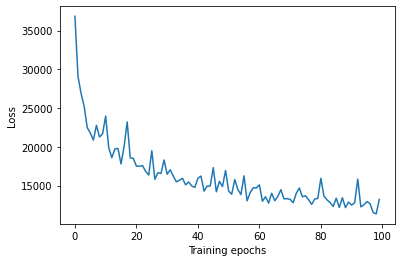

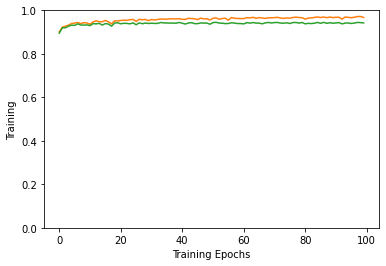

In [ ]:
model = FeedforwardNeuralNetwork([784, 16, 16, 10], 0.05, 0.0, 0.0, 32, 'cross-entropy')
# A 'cross entropy' sigmoid FFNN is defined and fitted. The hyperparameters remain the same.
model.fit(trainX, trainY, testX, testY, 100, 1)

In [ ]:
print("Test set accuracy")
testY = to_categorical(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
# The classification report is outputted.
testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))

Test set accuracy
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.98      0.99      1135
           2       0.93      0.93      0.93      1032
           3       0.91      0.95      0.93      1010
           4       0.95      0.92      0.93       982
           5       0.95      0.93      0.94       892
           6       0.96      0.94      0.95       958
           7       0.95      0.94      0.95      1028
           8       0.93      0.91      0.92       974
           9       0.90      0.93      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



### Sigmoid statistics: 
Time: 3 minutes and 26 seconds
Accuracy: 94%

### Considerations:
The sigmoid activation took way less than expected and had a stellar initial loss during each trial run. No tuning of the hyperparameters was needed to achieve greater accuracy, although changing the weights and learning rate will increase computational time. 

# HYPERBOLIC TANGENT

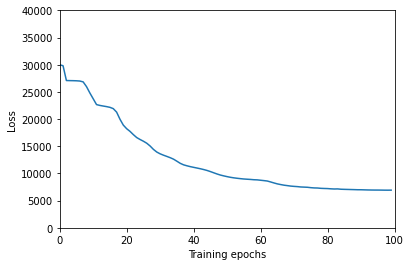

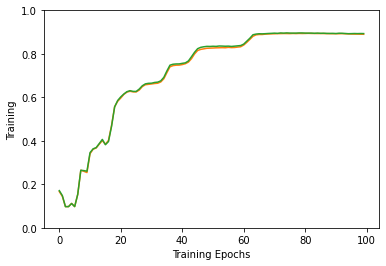

In [ ]:
model = FeedforwardNeuralNetwork([784, 16, 16, 10], 0.0001, 0.0, 0.0, 32, 'sum-of-squares',1)
# A 'sum of squares' hyperbolic tangent FFNN is defined and fitted. The learning rate is adjusted in order to maximize its performance. 
model.fit(trainX, trainY, testX, testY, 100, 1)

In [ ]:
print("Test set accuracy")
testY = to_categorical(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))
# The classification report is outputted.

Test set accuracy
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.95      0.98      0.96      1135
           2       0.86      0.88      0.87      1032
           3       0.96      0.77      0.85      1010
           4       0.85      0.93      0.89       982
           5       0.82      0.87      0.84       892
           6       0.95      0.89      0.92       958
           7       0.91      0.89      0.90      1028
           8       0.81      0.90      0.85       974
           9       0.89      0.85      0.87      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



### Hyperbolic tangent statistics:
Time: 5 minutes and 34 seconds
Accuracy: 89%
### Considerations: 
The hyperbolic tangent function only required for the learning rate to be decreased, as to be more thorough. Decreasing the learning rate would have resulted in 'nan' losses, while increasing would have resulted in a steady 0.568303 loss across all epochs. 'Sum-of-squares' is used, instead of 'cross-entropy'.

# RELU

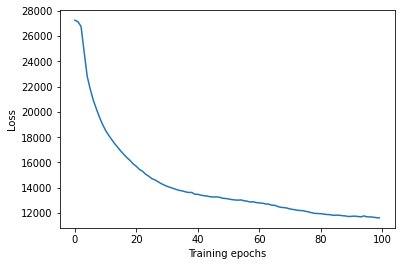

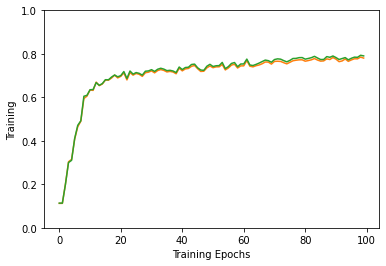

In [ ]:
model = FeedforwardNeuralNetwork([784, 16, 16, 10], 0.0001, 0.1, 0.5, 32, 'sum-of-squares', 2)
# A 'sum of squares' ReLU FFNN is defined and fitted. Learning rate is adjusted, along with L1 and L2 weights for optimal performance. 
model.fit(trainX, trainY, testX, testY, 100, 1)

In [ ]:
print("Test set accuracy")
testY = to_categorical(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))
# The classification report is outputted.

Test set accuracy
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       980
           1       0.88      0.98      0.93      1135
           2       0.89      0.85      0.87      1032
           3       0.84      0.90      0.87      1010
           4       0.00      0.00      0.00       982
           5       0.81      0.84      0.83       892
           6       0.85      0.96      0.90       958
           7       0.84      0.93      0.88      1028
           8       0.87      0.62      0.72       974
           9       0.46      0.82      0.59      1009

    accuracy                           0.79     10000
   macro avg       0.74      0.79      0.75     10000
weighted avg       0.74      0.79      0.76     10000



C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318

### ReLU statistics:
Time: 6 minutes and 14 seconds 
Accuracy: 79% 
### Considerations:
ReLU's last run could be considered bad, as the previous ones all had values ranging from 80% to 83%. Nevertheless, it is the activation function that took the most time and had the smallest accuracy. All hyperparameters have been tuned, and the addition of weights was the likely cause of the slowness. 

# BEST ONE: SIGMOID FUNCTION
## THAT IS WHAT SHALL BE USED. 

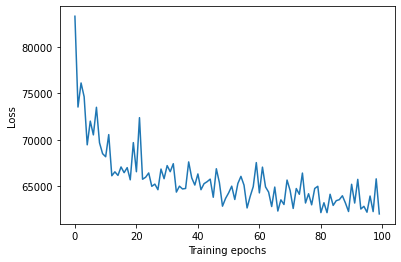

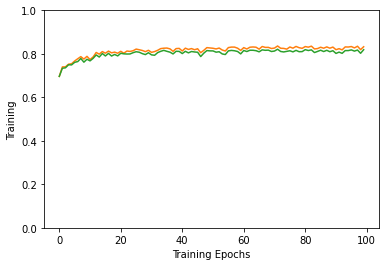

In [ ]:
model = FeedforwardNeuralNetwork([784, 4, 4, 10], 0.05, 0.0, 0.0, 32, 'cross-entropy')
# a 'cross entropy' FFNN is defined and fitted, with 4 datapoints per hidden layer.
model.fit(trainX, trainY, testX, testY, 100, 1)

In [ ]:
print("Test set accuracy")
testY = to_categorical(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))
# The classification report is outputted.

Test set accuracy
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       980
           1       0.98      0.97      0.97      1135
           2       0.91      0.85      0.88      1032
           3       0.84      0.81      0.82      1010
           4       0.90      0.57      0.70       982
           5       0.74      0.52      0.61       892
           6       0.91      0.91      0.91       958
           7       0.89      0.90      0.90      1028
           8       0.61      0.82      0.70       974
           9       0.65      0.85      0.74      1009

    accuracy                           0.82     10000
   macro avg       0.83      0.81      0.81     10000
weighted avg       0.83      0.82      0.82     10000



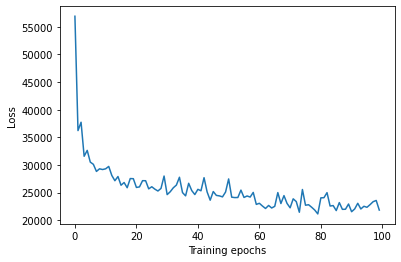

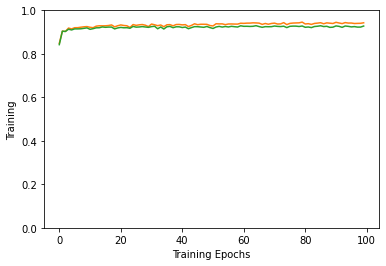

In [ ]:
model = FeedforwardNeuralNetwork([784, 10, 10, 10], 0.05, 0.0, 0.0, 32, 'cross-entropy')
# a 'cross entropy' FFNN is defined and fitted, with 10 datapoints per hidden layer.
model.fit(trainX, trainY, testX, testY, 100, 1)

In [ ]:
print("Test set accuracy")
testY = to_categorical(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))
# The classification report is outputted.

Test set accuracy
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       980
           1       0.98      0.98      0.98      1135
           2       0.90      0.95      0.92      1032
           3       0.91      0.90      0.90      1010
           4       0.91      0.95      0.93       982
           5       0.89      0.89      0.89       892
           6       0.95      0.92      0.94       958
           7       0.93      0.94      0.93      1028
           8       0.88      0.92      0.90       974
           9       0.96      0.87      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



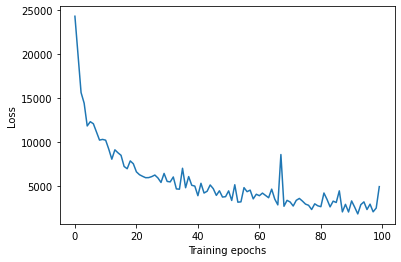

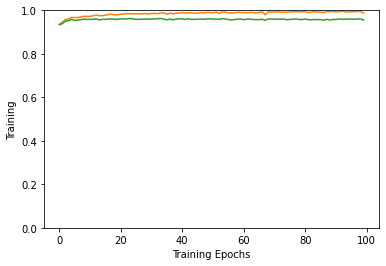

In [ ]:
model = FeedforwardNeuralNetwork([784, 32, 32, 10], 0.05, 0.0, 0.0, 32, 'cross-entropy')
# a 'cross entropy' FFNN is defined and fitted, with 32 datapoints per hidden layer.
model.fit(trainX, trainY, testX, testY, 100, 1)

In [ ]:
print("Test set accuracy")
testY = to_categorical(testY)
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))
# The classification report is outputted.

Test set accuracy
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.93      0.96      0.95      1010
           4       0.96      0.94      0.95       982
           5       0.94      0.95      0.95       892
           6       0.96      0.96      0.96       958
           7       0.96      0.95      0.96      1028
           8       0.95      0.94      0.94       974
           9       0.93      0.95      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



## Better architecture?
        Question V and Question VI ask the student to choose the best activation function and plot it for three different network sizes.  Sigmoid had the best accuracy and best runtime to begin with, so it was chosen.

        4 point-layer, 10 point-layer, 16 point-layer (used in the previous questions) and finally 32 point-layer SDG FFNN are tested on the MNist dataset. The results show that more layers equal much better accuracy.
## Why?
        There could be a number of reasons, with the most obvious one being that more points per layer equals more analysis for each data point. Each datapoint is fed into a thicker intermediary layer and is thus better analyzed. The weights assigned to it are then better quality and much more suited, along with its bias. 
